In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn as skl
%matplotlib notebook

In [5]:
#Step Function 입력변수가 숫자일 때
def step_function_num(x):
    if x>0 :
        return 1
    else :
        return 0

In [13]:
def step_function_astype(x):
    y=x>0
    return y.astype(np.int)

def step_function_nparray(x):
    return np.array(x>0, dtype=np.int)

In [12]:
x1=2.3
x2=np.array([-1.2, 3.4, 5, -0.6])
print(step_function_num(x1))
print(step_function_astype(x2))

1
[0 1 1 0]


In [26]:
a1= np.arange(-5.0, 5.0, 0.1)
y= step_function_nparray(a)
plt.plot(a1,y)
plt.ylim(-0.1,1.1) #y축의 범위 지정
plt.show

<function matplotlib.pyplot.show>

In [21]:
#Sigmoid Function : 얘는 브로드캐스트 기능으로 따로 자료형을 바꿀 필요가 없다.

def sigmoid(x):
    return 1/ (1+np.exp(-x))

x= np.array([-8, 268, 0.4, 0])
sigmoid(x)

array([3.3535013e-04, 1.0000000e+00, 5.9868766e-01, 5.0000000e-01])

<IPython.core.display.Javascript object>


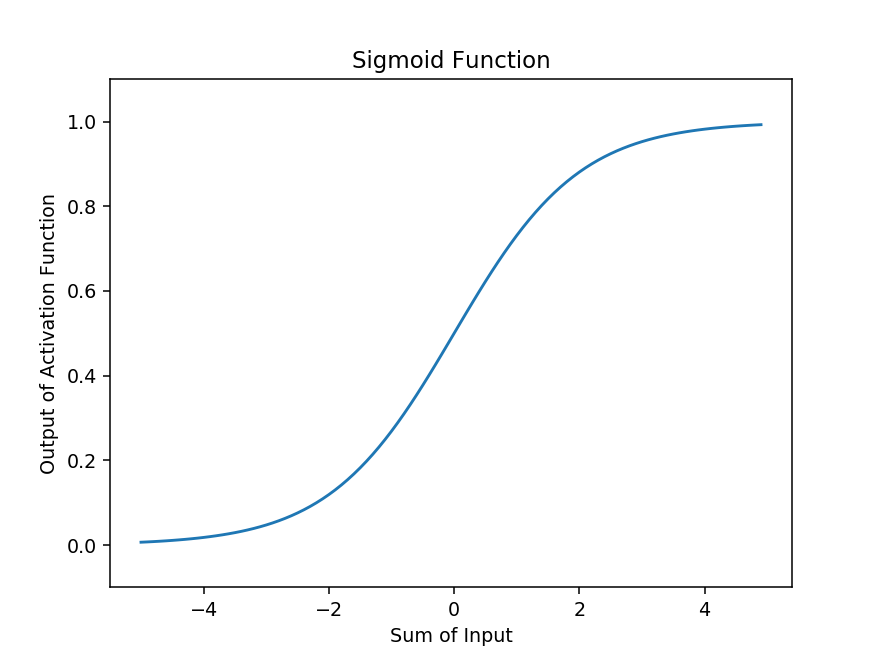

<function matplotlib.pyplot.show>

In [29]:
a2= np.arange(-5.0, 5.0, 0.1)
y= sigmoid(a2)
plt.plot(a2,y)
plt.ylim(-0.1,1.1) #y축의 범위 지정
plt.xlabel("Sum of Input")
plt.ylabel("Output of Activation Function")
plt.title("Sigmoid Function")
plt.show

In [31]:
#ReLU

def relu(x):
    return np.maximum(0,x)

In [37]:
#행렬의 곱
#np.array는 []이게 하나의 행이다. 

A=np.array([[1,2,3],[4,5,6]])
B=np.array([[1,2,3],[4,5,6,],[7,8,9]]) #대괄호를 한 번 더 해줘라

AB=np.dot(A,B) #그냥 때려버리네

print(AB)

[[30 36 42]
 [66 81 96]]


In [55]:
#파라미터(가중치,X변수,bias) 지정
X=np.array([1, 0.5]) #1*2
W1=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]]) #2*3
W2=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])#3*2
W3=np.array([[0.1,0.3],[0.2,0.4]])#2*2

B1=np.array([0.1,0.2,0.3]) # 1*3
B2=np.array([0.1,0.2])#1*2
B3=np.array([0.1,0.2])#1*2

In [50]:
#첫번째 은닉층 결과
A1=np.dot(X,W1)+B1#1*3
Z1=sigmoid(A1)#1*3

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [54]:
#두번째 은닉층 결과
A2=np.dot(Z1,W2)+B2
Z2=sigmoid(A2)
print(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [75]:
#세번째 은닉층 결과
A3=np.dot(Z2,W3)+B3
Z3=sigmoid(A3)
print(A3)
print(Z3)

[0.31682708 0.69627909]
[0.57855079 0.66736228]


In [78]:
def init_network(): #파라미터 지정
    network={}
    network['W1']=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1']=np.array([0.1,0.2,0.3])
    network['W2']=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2']=np.array([0.1,0.2])
    network['W3']=np.array([[0.1,0.3],[0.2,0.4]])
    network['b3']=np.array([0.1,0.2])
    
    return network


type(init_network)

function

In [79]:
def init_network(): #파라미터 지정
    network={} #딕셔러니 변수
    network['W1']=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1']=np.array([0.1,0.2,0.3])
    network['W2']=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2']=np.array([0.1,0.2])
    network['W3']=np.array([[0.1,0.3],[0.2,0.4]])
    network['b3']=np.array([0.1,0.2])
    
    return network
    
def forward(network,x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    a2=np.dot(z1,W2)+b2
    z2=sigmoid(a2)
    a3=np.dot(z2,W3)+b3
    
    y= a3
    
    return y

network = init_network()
x=np.array([1,0.5])
y=forward(network,x)

print(y)

[0.31682708 0.69627909]


In [91]:
#softmax 함수

def softmax(a):
    c=np.max(a)
    exp_a=np.exp(a-c)#overflow 방지
    sum_exp_a=np.sum(exp_a)
    y= exp_a/ sum_exp_a
    
    return y
